# Chapter 31

# Keras and OpenCV II

1. Keras Model Saving 
2. Keras Model Loading

## Keras Model Saving

## Keras Model Loading

In [1]:
import cv2 as cv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [10]:

def fixImage(imgRGB):
    # model expect shape of image to be 200x200
    desiredShape = (200, 200, 3)

    N = 1

    shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

    y = np.empty(shape, dtype='uint8')

    y[0] = cv.resize(imgRGB, [200,200], interpolation=cv.INTER_NEAREST)

    return y



In [11]:

def fixImages(imgRGBs):
    # model expect shape of image to be 200x200
    desiredShape = (200, 200, 3)

    N = len(imgRGBs)

    shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

    y = np.empty(shape, dtype='uint8')

    for i in range(N):
        y[i] = cv.resize(imgRGBs[i], [200,200], interpolation=cv.INTER_NEAREST)

    return y



In [12]:

# 
classes = ['afiq',
 'azureen',
 'gavin',
 'goke',
 'inamul',
 'jincheng',
 'mahmuda',
 'numan',
 'saseendran']


In [13]:

# load model
exportPath = 'tf_model/4_max'
model = tf.keras.models.load_model(exportPath)

# Check its architecture
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 120000)            0         
                                                                 
 dense_28 (Dense)            (None, 128)               15360128  
                                                                 
 dense_29 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 15,361,289
Trainable params: 15,361,289
Non-trainable params: 0
_________________________________________________________________


In [14]:

# prepare image according to model shape
img = cv.imread('../gokPrj/dataset/fix_dataset/s32/inamul.png')
print(img.shape)
imgRGB = img[:,:,::-1]


(124, 156, 3)


In [15]:

imgRGB = fixImage(imgRGB)

imgRGB.shape

(1, 200, 200, 3)

In [16]:


# predict
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probabilityModel.predict(imgRGB)


In [17]:

# highest index
imax = np.argmax(predictions[0])


In [18]:

# find index in class
# corresponding label
label = classes[imax]


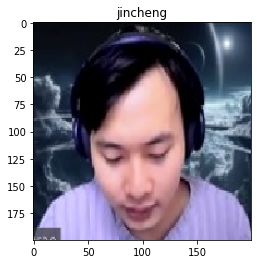

In [21]:

plt.imshow(imgRGB.squeeze())
plt.title(label)
plt.show()